In [196]:
import numpy as np
import pandas as pd
import matplotlib
from importlib import reload
reload(matplotlib.pyplot)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [197]:
df=pd.read_csv('/1730285881-Airbnb_Open_Data.csv',low_memory=False)

In [198]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7925 entries, 0 to 7924
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7925 non-null   int64  
 1   NAME                            7862 non-null   object 
 2   host id                         7925 non-null   int64  
 3   host_identity_verified          7852 non-null   object 
 4   host name                       7902 non-null   object 
 5   neighbourhood group             7898 non-null   object 
 6   neighbourhood                   7909 non-null   object 
 7   lat                             7917 non-null   float64
 8   long                            7917 non-null   float64
 9   country                         7874 non-null   object 
 10  country code                    7845 non-null   object 
 11  instant_bookable                7845 non-null   object 
 12  cancellation_policy             78

In [200]:
df.duplicated().value_counts()

,count
False,7925


In [201]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,06/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [236]:


# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Clean up column names (remove spaces, unify case)
df.columns = df.columns.str.strip()

# Safely clean 'price' and 'service fee' columns
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                               # ensure all string
            .str.replace('$', '', regex=False)          # remove dollar sign
            .str.replace(',', '', regex=False)          # remove commas
            .replace('nan', np.nan)                     # restore real NaNs
        )

# Rename columns safely (only if they exist)
df.rename(
    columns={
        'price': 'price_$',
        'service fee': 'service_fee_$'
    },
    inplace=True
)

# Drop rows with any missing values
df.dropna(inplace=True)

# Convert data types safely if columns exist
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)

if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)

if 'id' in df.columns:
    df['id'] = df['id'].astype(str)

if 'host_id' in df.columns:
    df['host_id'] = df['host_id'].astype(str)

if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

if 'Construction year' in df.columns:
    df['Construction year'] = df['Construction year'].astype(int, errors='ignore')

# Correct spelling in neighbourhood names (only if column exists)
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'].str.lower() == 'brookln', 'neighbourhood group'] = 'Brooklyn'


In [217]:
df.duplicated().value_counts()

,count
False,6468


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 0 to 7923
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6468 non-null   object 
 1   NAME                            6468 non-null   object 
 2   host id                         6468 non-null   int64  
 3   host_identity_verified          6468 non-null   object 
 4   host name                       6468 non-null   object 
 5   neighbourhood group             6468 non-null   object 
 6   neighbourhood                   6468 non-null   object 
 7   lat                             6468 non-null   float64
 8   long                            6468 non-null   float64
 9   country                         6468 non-null   object 
 10  country code                    6468 non-null   object 
 11  instant_bookable                6468 non-null   object 
 12  cancellation_policy             6468 no

In [219]:
df.describe()

,host id,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,6.468000e+03,6468.000000,6468.000000,6468.000000,6449.000000,6447.000000,6468.000000,6468.00000,6468.000000,6468.000000,6468.000000,6468.000000
mean,4.917243e+10,40.729142,-73.958565,2012.430581,617.476043,123.401272,8.702072,53.87013,0.894668,3.011596,2.781076,207.707638
std,2.859317e+10,0.052537,0.036618,5.779836,337.623355,67.476840,28.996096,71.64054,1.145862,1.422071,7.115257,126.223891
min,1.316021e+08,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.00000,0.010000,1.000000,1.000000,-10.000000
25%,2.428433e+10,40.688215,-73.983593,2007.750000,321.000000,64.000000,2.000000,7.00000,0.130000,2.000000,1.000000,96.750000
50%,4.896910e+10,40.722885,-73.958640,2012.000000,617.000000,123.000000,3.000000,22.00000,0.400000,3.000000,1.000000,210.000000
75%,7.405842e+10,40.764380,-73.942888,2017.000000,913.000000,183.000000,5.000000,73.00000,1.240000,4.000000,2.000000,317.000000
max,9.873673e+10,40.908040,-73.729010,2022.000000,1200.000000,240.000000,1250.000000,607.00000,13.450000,5.000000,96.000000,426.000000


In [220]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,3881
Private room,2501
Shared room,86


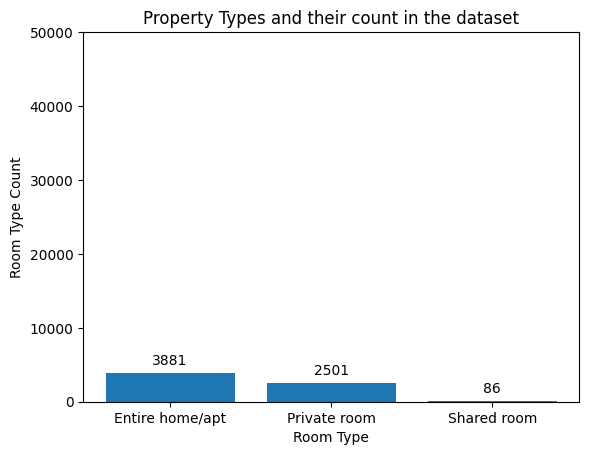

In [228]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4); # Corrected usage of plt.bar_label
plt.ylim(0,50000);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the dataset');

In [222]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,2955
Brooklyn,2882
Queens,502
Bronx,96
Staten Island,32
brookln,1


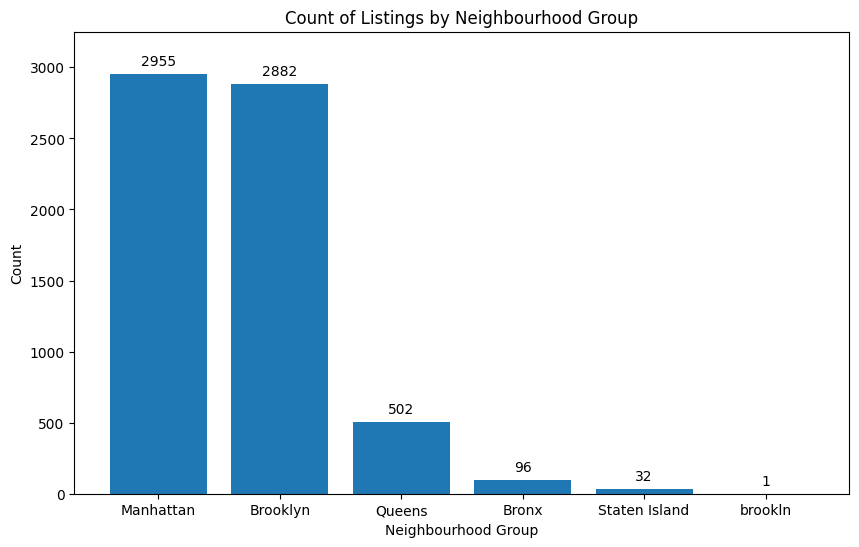

In [223]:
plt.figure(figsize=(10, 6))
hood_group_bar = plt.bar(hood_group.index, hood_group['count'])
plt.bar_label(hood_group_bar, labels=hood_group['count'], padding=4)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Count of Listings by Neighbourhood Group')
plt.ylim(0, hood_group['count'].max() * 1.1)
plt.show()

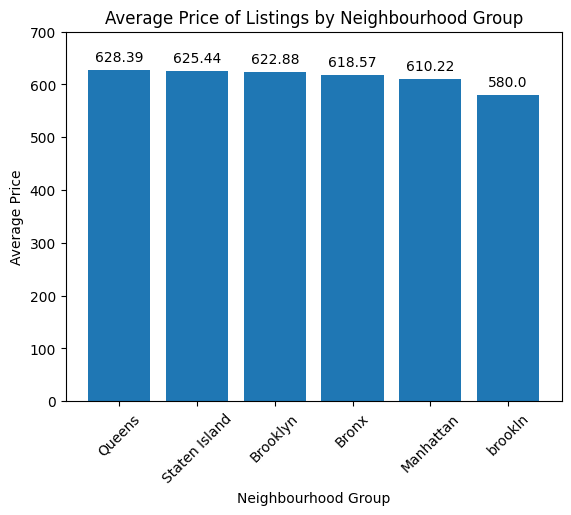

In [227]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price_$"],2),label_type='edge',padding=4); # Corrected usage
plt.ylim(0,700);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price');
plt.xticks(rotation=45);
plt.title('Average Price of Listings by Neighbourhood Group');
plt.show() # Added plt.show() to display the plot

Text(0.5, 1.0, 'Average Listing Price by Construction Year')

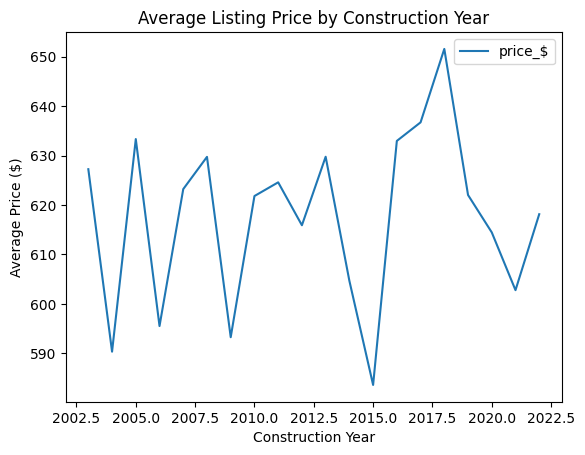

In [230]:
avg_price_by_year = df.groupby('Construction year')['price_$'].mean().to_frame().plot() # Corrected column name
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Listing Price by Construction Year')


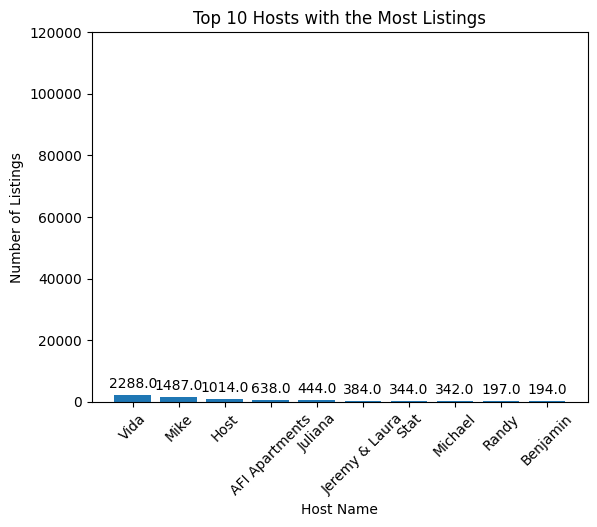

In [231]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,labels=hosts.loc[:,"calculated host listings count"],label_type='edge' ,padding=3); # Corrected usage
plt.xlabel('Host Name');
plt.ylabel('Number of Listings');
plt.title('Top 10 Hosts with the Most Listings');
plt.xticks(rotation=45);
plt.ylim([0,120000]);

In [232]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).nlargest(10).to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.024263
verified,2.998755


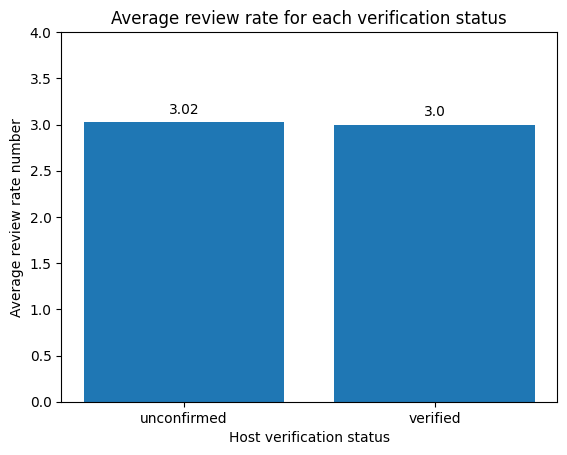

In [233]:
review_bar=plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels=[round(x, 2) for x in review["review rate number"]], padding=4); # Corrected usage and rounding labels
plt.ylim([0,4]);
plt.xlabel('Host verification status');
plt.ylabel('Average review rate number');
plt.title('Average review rate for each verification status');
plt.show()

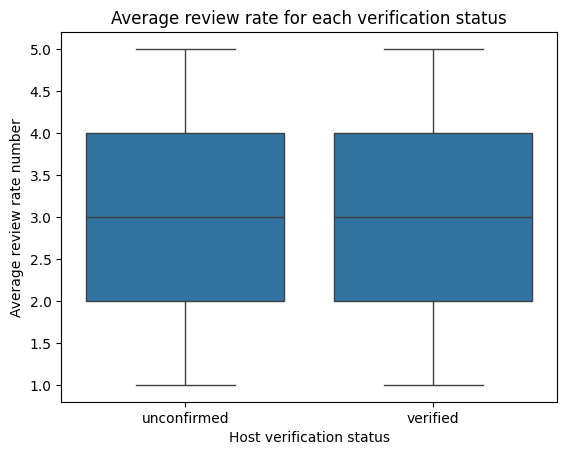

In [204]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x="host_identity_verified",y="review rate number",color=base_color) # Corrected column name
plt.xlabel('Host verification status');
plt.ylabel('Average review rate number');
plt.title('Average review rate for each verification status');
plt.show()

In [205]:
correlation = df['price'].corr(df['service fee'])
print(f"The correlation between price and service fee is: {correlation}")

The correlation between price and service fee is: 0.9999912695592923


Text(0.5, 1.0, 'A regplot showing correlation of listing and service fee')

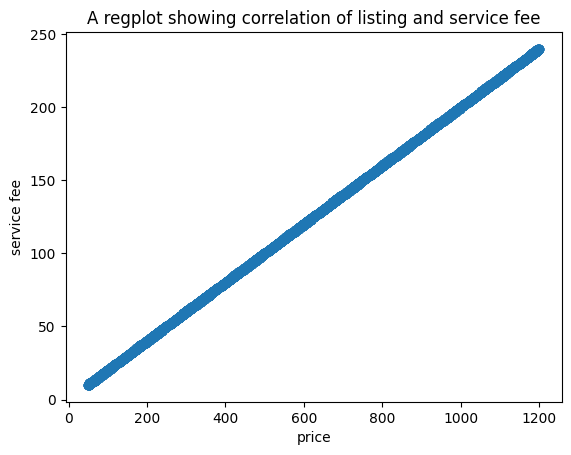

In [206]:
sns.regplot(df,x='price',y='service fee')
plt.xlabel('price')
plt.ylabel('service fee')
plt.title('A regplot showing correlation of listing and service fee')

In [207]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.032258
                    Private room               2.914286
                    Shared room                1.333333
Brooklyn            Entire home/apt            2.968610
                    Private room               3.083449
                    Shared room                2.851852
Manhattan           Entire home/apt            3.015846
                    Private room               3.019151
                    Shared room                2.887097
Queens              Entire home/apt            2.901235
                    Private room               3.055728
                    Shared room                3.176471
Staten Island       Entire home/apt            3.227273
                    Private room               2.789474
brookln             Private room               4.000000
manhatan            Private room               3.000000

Text(0.5, 1.0, 'Average Review Rate Number by Neighbourhood Group and Room Type')

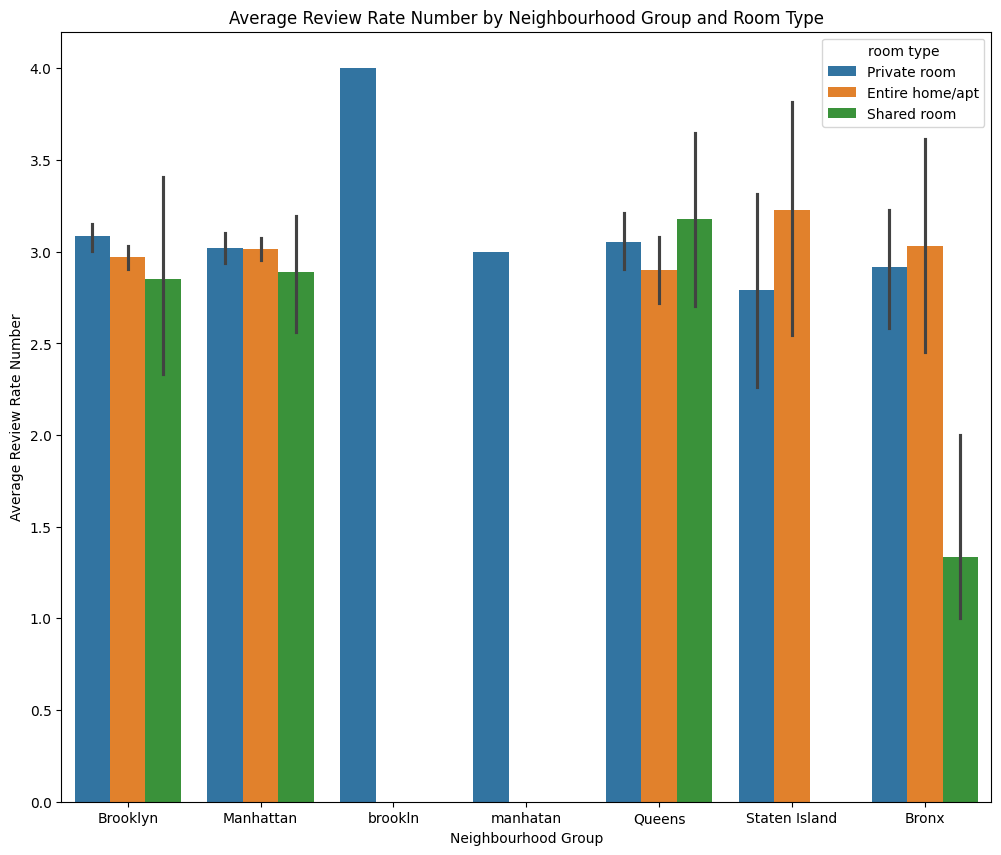

In [208]:
plt.figure(figsize=[12,10])
sns.barplot(df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number by Neighbourhood Group and Room Type')

Text(0.5, 1.0, 'A regplot showing correlation of listing and availability')

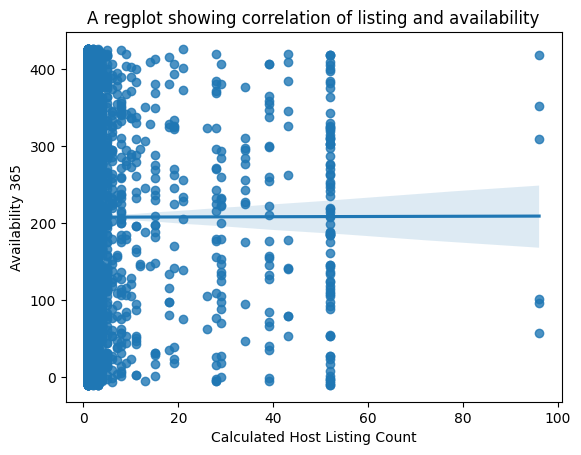

In [209]:
sns.regplot(df,x='calculated host listings count', y='availability 365')
plt.xlabel('Calculated Host Listing Count')
plt.ylabel('Availability 365')
plt.title('A regplot showing correlation of listing and availability')

In [210]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.0008297337901294418)